<a href="https://colab.research.google.com/github/AI-Enthusiast/18650-Accelerated-Battery-Life-Testing/blob/main/second_battery_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
#file_path = '/content/drive/My Drive/second.csv'
file_path = 'second.csv'

In [4]:
import pandas as pd

#loading the csv
second = pd.read_csv(file_path)


#first few rows
second.head()

,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode
0,0,1,6.764255,27.414266,2.520549,2605.058,1
1,1,2,6.842322,27.095019,2.521546,2703.561,1
2,2,3,6.494144,43.639019,9.803554,695.839,1
3,3,4,6.492340,43.853476,9.757483,696.321,1
4,4,5,6.483154,43.372276,9.759371,695.027,1


In [5]:
#checking format
sample_df = pd.read_csv(file_path, nrows=10)
print(sample_df)

   Unnamed: 0  dischargePhase  voltage_charger  temperature_battery  \
0           0               1         6.764255            27.414266   
1           1               2         6.842322            27.095019   
2           2               3         6.494144            43.639019   
3           3               4         6.492340            43.853476   
4           4               5         6.483154            43.372276   
5           5               6         6.482666            43.863185   
6           6               7         6.481603            44.021626   
7           7               8         6.481435            43.894868   
8           8               9         6.477964            44.027571   
9           9              10         6.477805            44.030315   

   current_load  time_end  mode  
0      2.520549  2605.058     1  
1      2.521546  2703.561     1  
2      9.803554   695.839     1  
3      9.757483   696.321     1  
4      9.759371   695.027     1  
5      9.75950

In [6]:
# checking columns and data types
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1405 non-null   int64  
 1   dischargePhase       1405 non-null   int64  
 2   voltage_charger      1405 non-null   float64
 3   temperature_battery  1405 non-null   float64
 4   current_load         1405 non-null   float64
 5   time_end             1405 non-null   float64
 6   mode                 1405 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 77.0 KB


In [7]:
#checking for missing or null values
second.isnull().sum()

Unnamed: 0             0
dischargePhase         0
voltage_charger        0
temperature_battery    0
current_load           0
time_end               0
mode                   0
dtype: int64

In [8]:
import numpy as np

#adding arrhenius temp column
second['arrhenius_temperature'] = 11605/(second['temperature_battery'] + 273.15)

#adding log_voltage column
second['log_voltage'] = np.log10(second['voltage_charger'])

#display first few rows
second.head()


,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode,arrhenius_temperature,log_voltage
0,0,1,6.764255,27.414266,2.520549,2605.058,1,38.610711,0.830220
1,1,2,6.842322,27.095019,2.521546,2703.561,1,38.651765,0.835203
2,2,3,6.494144,43.639019,9.803554,695.839,1,36.633214,0.812522
3,3,4,6.492340,43.853476,9.757483,696.321,1,36.608431,0.812401
4,4,5,6.483154,43.372276,9.759371,695.027,1,36.664086,0.811786


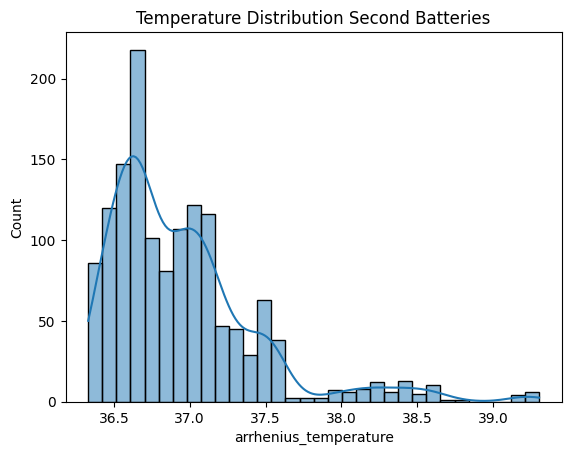

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#distribution of temperature
sns.histplot(second['arrhenius_temperature'], kde= True)
plt.title('Temperature Distribution Second Batteries')
plt.show()

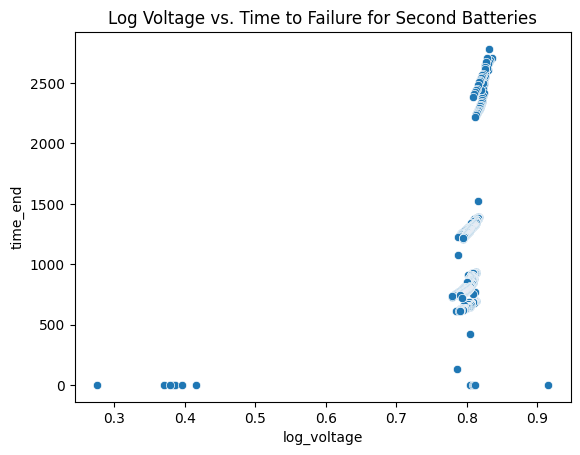

In [10]:
#relationship b/w log_voltage and time to failure
sns.scatterplot(x='log_voltage' , y='time_end', data=second)
plt.title('Log Voltage vs. Time to Failure for Second Batteries')
plt.show()


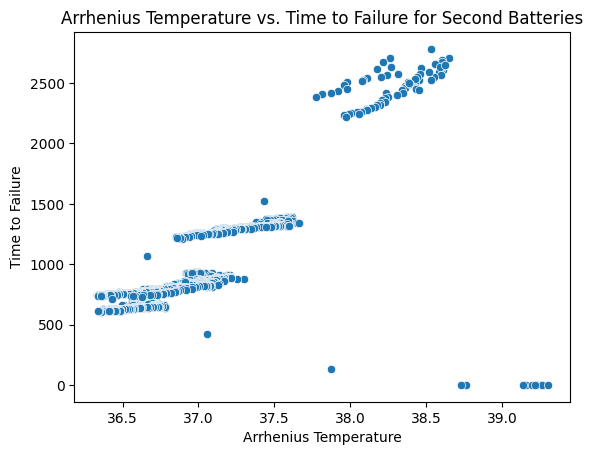

In [11]:
#relationship between arrhenius temp and time_end
sns.scatterplot(x='arrhenius_temperature' , y = 'time_end', data=second)
plt.title('Arrhenius Temperature vs. Time to Failure for Second Batteries')
plt.xlabel('Arrhenius Temperature')
plt.ylabel('Time to Failure')
plt.show()

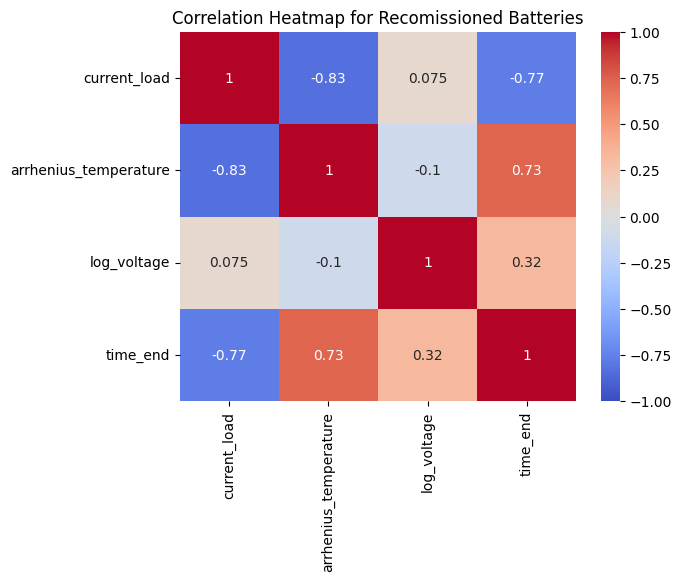

In [12]:
#correlation heatmap
corr = second[['current_load', 'arrhenius_temperature' , 'log_voltage' , 'time_end' ]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Recomissioned Batteries')
plt.show()

In [13]:
import plotly.graph_objs as go
import plotly.express as px

#creating a 3d scatter plot
fig = px.scatter_3d(
    second,
    x='current_load',
    y='arrhenius_temperature',
    z='time_end',
    color='log_voltage',
    labels={'current_load' : 'Current Load',
            'arrhenius_temperature' : 'Arrhenius Temperature',
            'time_end' : 'Time to Failure' },
    title = '3D Scatter Plot: Current Load, Arrhenius Temperature, and Time to Failure'
)

#updating the layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Current Load',
        yaxis_title='Arrhenius Temperature Battery',
        zaxis_title='Time to Failure'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

#show the plot
fig.show()

In [14]:
#calculating temp alt
second['temp_volt'] = second['arrhenius_temperature'] * second['log_voltage']

#check first few rows
second.head()

,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode,arrhenius_temperature,log_voltage,temp_volt
0,0,1,6.764255,27.414266,2.520549,2605.058,1,38.610711,0.830220,32.055383
1,1,2,6.842322,27.095019,2.521546,2703.561,1,38.651765,0.835203,32.282089
2,2,3,6.494144,43.639019,9.803554,695.839,1,36.633214,0.812522,29.765289
3,3,4,6.492340,43.853476,9.757483,696.321,1,36.608431,0.812401,29.740735
4,4,5,6.483154,43.372276,9.759371,695.027,1,36.664086,0.811786,29.763404


In [21]:
#Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#splitting data into feature and target
X = second[['arrhenius_temperature', 'log_voltage' ,  'current_load' , 'temp_volt']]
y = second['time_end']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#predictions
y_pred = lr_model.predict(X_test)

#evaluations
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
rss = np.sum((y_test-y_pred)**2)
k = X_train.shape[1] + 1
aic = n * np.log(rss / n) +2 * k
print(f'Mean Square Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'AIC Score: {aic}')

Mean Square Error: 28230.96234740519
R^2 Score: 0.8733317198034306
AIC Score: 2889.7370654649503


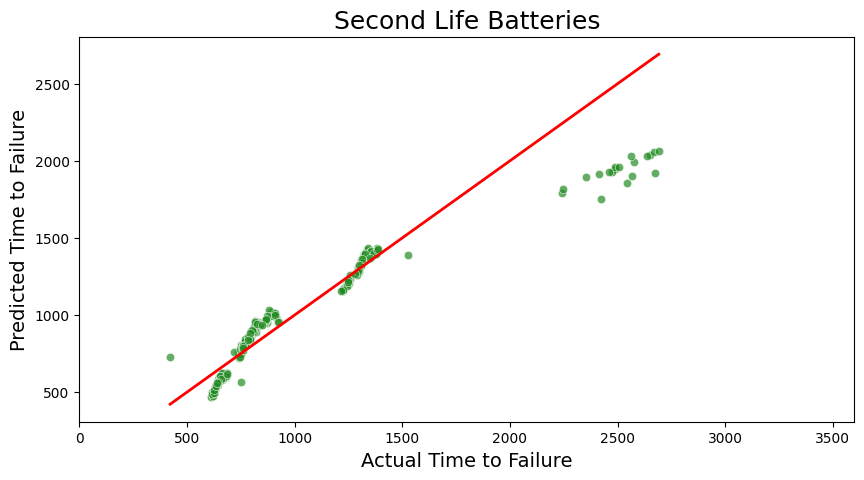

In [25]:
import seaborn as sns

plt.figure(figsize=(10,5))
#sns.scatterplot(x=y_test,y=y_pred_rf, color='forestgreen',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
sns.scatterplot(x=y_test,y=y_pred, color='forestgreen',alpha=0.7)
# Plot details
plt.xlabel('Actual Time to Failure',fontsize=14)
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Second Life Batteries',fontsize = 18)
#plt.suptitle('Predicted vs Actual: Linear Regression',fontsize=22,y=1)
plt.xlim(0,3600)

# Show plot
plt.show()

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#predictions
y_pred_rf = rf_model.predict(X_test)

#evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
n = len(y_test)
rss = np.sum((y_test-y_pred_rf)**2)
k = X_train.shape[1] + 1
aic_rf = n * np.log(rss / n) +2 * k
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - AIC Score: {aic_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')


Random Forest - Mean Squared Error: 510.1438233338184
Random Forest - AIC Score: 1761.9486465921912
Random Forest - R^2 Score: 0.997711057810945


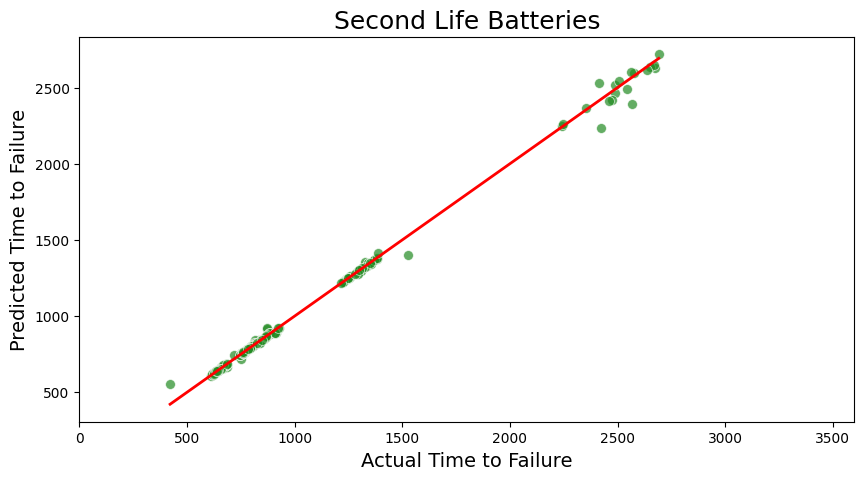

In [28]:
import seaborn as sns

plt.figure(figsize=(10,5))
#sns.scatterplot(x=y_test,y=y_pred_rf, color='forestgreen',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
sns.scatterplot(x=y_test,y=y_pred_rf, color='forestgreen',alpha=0.7,s=50)
# Plot details
plt.xlabel('Actual Time to Failure',fontsize=14)
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Second Life Batteries',fontsize = 18)
#plt.suptitle('Predicted vs Actual: Linear Regression',fontsize=22,y=1)
plt.xlim(0,3600)

# Show plot
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#select relevant features and target
X = second[['arrhenius_temperature', 'log_voltage' , 'current_load' , 'time_end']]
y = second[['time_end']]


In [ ]:
# split the data in training and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Defining the FNN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
#compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
#training the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs = 50, batch_size=32)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1025285.1875 - mae: 934.1176 - val_loss: 1146394.1250 - val_mae: 953.0311
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 914433.1250 - mae: 843.1743 - val_loss: 593840.5625 - val_mae: 589.6959
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 377075.4375 - mae: 475.1471 - val_loss: 89046.5703 - val_mae: 243.7733
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 80981.9141 - mae: 213.7214 - val_loss: 42047.0898 - val_mae: 134.3462
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 54641.8594 - mae: 161.4654 - val_loss: 31397.2676 - val_mae: 106.7284
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 57529.4492 - mae: 141.7204 - val_loss: 24178.9785 - val_mae: 82.1674
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 42706.1758 - mae: 117.4562 - val_loss: 19951.6152 - val_mae: 65.4641
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 40471.2109 - mae: 117.3641 - val_los

In [ ]:
#evaluate
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss : {test_loss}")
print(f"Test MAE : {test_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395.8576 - mae: 15.4095 
Test Loss : 363.8200988769531
Test MAE : 14.76089859008789


<function matplotlib.pyplot.show(close=None, block=None)>

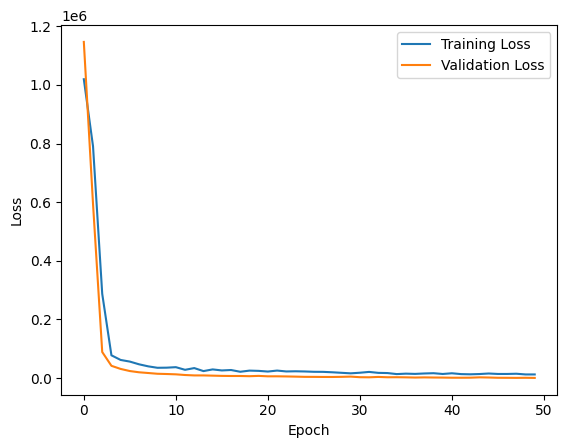

In [ ]:
import matplotlib.pyplot as plt

#plotting the training history
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled)

# Displaying predictions vs actual values
for i in range(10):
    print(f"Predicted: {y_pred[i][0]}, Actual: {y_test.iloc[i].values[0]}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted: 1507.8182373046875, Actual: 1524.3310000000347
Predicted: 855.3649291992188, Actual: 832.6820000000298
Predicted: 816.2554931640625, Actual: 796.3559999999125
Predicted: 815.0310668945312, Actual: 795.1570000001229
Predicted: 766.1727294921875, Actual: 751.7269999999553
Predicted: 901.2105712890625, Actual: 914.2860000000072
Predicted: 1311.145263671875, Actual: 1312.2700000000186
Predicted: 671.1838989257812, Actual: 664.4050000000279
Predicted: 671.1975708007812, Actual: 672.4729999999981
Predicted: 795.2133178710938, Actual: 776.1320000002161
